# 🚀 WaveSpeed AI Workshop
## Accelerate Your AI Image & Video Generation

Welcome to this hands-on workshop! here You'll learn how to use WaveSpeed AI to make amazing images and videos super fast! Build your own website and start your creative journey.

You can be an AI artist. You can be a super creator. You can lead in the AI age.


### What You'll Learn Today
- How to set up and access WaveSpeed AI services
- Creating high-quality images in under 3 seconds
- Generating videos from text or images under 2 minutes
- Integrating these capabilities into your own applications


### Why WaveSpeed AI?
- **Ultra-Fast Generation**: Images in < 3 seconds, Videos in < 2 minutes
- **High-Quality Results**: Professional-grade outputs for commercial use
- **Simple API**: Easy integration with any application
- **Flexible Models**: Multiple models for different creative needs

Let's dive in and start creating!



## 🔑 Getting Started

Before we can start generating amazing content, we need to set up our environment and get our API key.

### Step 1: Create Your WaveSpeed AI Account

1. Visit [WaveSpeed AI](https://wavespeed.ai/sign-in)
2. Click on "Sign Up" and complete the registration
3. Verify your email address

![Account Creation](https://d2g64w682n9w0w.cloudfront.net/media/77994ba9797b421e871dc29823d11b7f/images/1746866295083190046_Thea7GBx.png)


### Step 2: Generate Your API Key

1. Navigate to [Access Keys](https://wavespeed.ai/accesskey)
2. Click "Create New Key"
3. Give your key a name (e.g., "Workshop Key")
4. Copy your key to a secure location - you'll need it for the next steps!

![API Key Generation](https://d2g64w682n9w0w.cloudfront.net/media/77994ba9797b421e871dc29823d11b7f/images/1746866480421561131_OpEByvrn.png)


### Step 3: Configure your "WAVESPEED_API_KEY" in the Secrets section.
![Secrets](https://d2g64w682n9w0w.cloudfront.net/media/77994ba9797b421e871dc29823d11b7f/images/1747187328473761907_IT841YUQ.jpg)


### Step 4: Set Up Your Environment

Let's install the necessary packages for this workshop:

In [1]:
# Run this cell to install required packages
!pip install requests pillow matplotlib ipywidgets

# Import the libraries we'll need
import os
import requests
import json
import time
import base64
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image as IPImage
import ipywidgets as widgets
from google.colab import userdata
import io
from functools import lru_cache  # Added for caching

# Get API key securely
API_KEY = userdata.get('WAVESPEED_API_KEY')

# Create a session object for better performance
session = requests.Session()

# Let's verify we have what we need
if not API_KEY:
    print("⚠️ Please set your API key before proceeding!")
else:
    print("✅ API key is set! You're ready to go!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
✅ API key is set! You're ready to go!


## 🖼️ Your First AI Image Generation

Now that we're all set up, let's generate our first image using WaveSpeed's FLUX-dev model. This model can create high-quality images in under 3 seconds!

### How It Works

1. We send a text prompt to the API
2. WaveSpeed processes the request
3. We poll for results until the image is ready
4. We display and save the resulting image

Let's try it out with a simple example:

In [ ]:
def generate_image(prompt, negative_prompt="", model="flux-dev-ultra-fast"):
    """
    Generate an image using WaveSpeed AI

    Parameters:
    - prompt: Text description of the image you want to create
    - negative_prompt: Things you want to avoid in the image
    - model: The AI model to use (default: flux-dev)

    Returns:
    - Image URL and generation time
    """
    print(f"🚀 Generating image with prompt: '{prompt}'")

    url = f"https://api.wavespeed.ai/api/v2/wavespeed-ai/{model}"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {API_KEY}",
    }
    payload = {
        "enable_base64_output": True,
        "enable_safety_checker": True,
        "guidance_scale": 7.5,
        "num_images": 1,
        "num_inference_steps": 28,
        "prompt": prompt,
        "negative_prompt": negative_prompt,
        "seed": -1,  # Random seed
        "size": "1024*1024",
    }

    # Start timing
    begin = time.time()

    # Submit the task
    response = requests.post(url, headers=headers, data=json.dumps(payload))
    if response.status_code != 200:
        print(f"❌ Error: {response.status_code}, {response.text}")
        return None, None

    result = response.json()["data"]
    request_id = result["id"]
    print(f"✅ Task submitted successfully. Request ID: {request_id}")

    # Poll for results
    result_url = f"https://api.wavespeed.ai/api/v2/predictions/{request_id}/result"
    while True:
        response = requests.get(result_url, headers={"Authorization": f"Bearer {API_KEY}"})
        if response.status_code != 200:
            print(f"❌ Error checking status: {response.status_code}, {response.text}")
            return None, None

        result = response.json()["data"]
        status = result["status"]

        if status == "completed":
            end = time.time()
            generation_time = end - begin
            print(f"✅ Image generated in {generation_time:.2f} seconds!")

            # Get the image URL
            image_url = result["outputs"][0]

            # If base64 is available, display the image directly
            if "base64" in result:
                image_data = base64.b64decode(result["base64"])
                image = Image.open(io.BytesIO(image_data))
                plt.figure(figsize=(10, 10))
                plt.imshow(image)
                plt.axis('off')
                plt.title(f"Prompt: {prompt}")
                plt.show()

            return image_url, generation_time

        elif status == "failed":
            print(f"❌ Task failed: {result.get('error')}")
            return None, None

        else:
            print(f"⏳ Task still processing. Status: {status}")

        time.sleep(0.5)  # Poll every half second

# Let's try it out!
prompt = "Workshop in San Francisco, attendees are deeply engaged in learning about Freepik and WaveSpeed"
negative_prompt = "blurry, distorted, low quality, ugly"

image_url, generation_time = generate_image(prompt, negative_prompt)

if image_url:
    print(f"🔗 Image URL: {image_url}")
    print(f"⏱️ Total generation time: {generation_time:.2f} seconds")

    # Display the image from URL
    display(IPImage(url=image_url, width=600))

🚀 Generating image with prompt: 'Workshop in San Francisco, attendees are deeply engaged in learning about Freepik and WaveSpeed'
✅ Task submitted successfully. Request ID: fc058a91aec44c86b1525b2f8423212e
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
✅ Image generated in 2.85 seconds!
🔗 Image URL: https://d2g64w682n9w0w.cloudfront.net/predictions/fc058a91aec44c86b1525b2f8423212e/1.jpg
⏱️ Total generation time: 2.85 seconds


## 🎨 Interactive Image Generation

Now let's make this more interactive! You can use the form below to create your own images with custom prompts.

Try different prompts to see how they affect the generated images. Here are some ideas:
- "A city at night with bright, colorful lights."
- "A real-looking picture of a husky in the snow."
- "An astronaut on a horse on Mars, in digital art."

In [ ]:
# Create interactive widgets
prompt_input = widgets.Textarea(
    value="A beautiful landscape with mountains and a lake, high quality, 4k",
    placeholder='Enter your prompt here...',
    description='Prompt:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='80px')
)

negative_prompt_input = widgets.Textarea(
    value="low quality, blurry, distorted",
    placeholder='Enter negative prompt here...',
    description='Negative:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='80px')
)

model_dropdown = widgets.Dropdown(
    options=['flux-dev', 'flux-dev-lora'],
    value='flux-dev',
    description='Model:',
    disabled=False,
)

generate_button = widgets.Button(
    description='Generate Image',
    disabled=False,
    button_style='success',
    tooltip='Click to generate an image',
    icon='rocket'
)

output_area = widgets.Output()

# Layout the widgets
form = widgets.VBox([
    widgets.HTML("<h3>Create Your Own Image</h3>"),
    prompt_input,
    negative_prompt_input,
    model_dropdown,
    generate_button,
    output_area
])

# Define button click handler
def on_button_click(b):
    with output_area:
        output_area.clear_output()
        print("Generating your image... Please wait.")
        image_url, generation_time = generate_image(
            prompt_input.value,
            negative_prompt_input.value,
            model_dropdown.value
        )
        if image_url:
            print(f"Image generated in {generation_time:.2f} seconds!")
            display(IPImage(url=image_url, width=600))

# Connect the button to the handler
generate_button.on_click(on_button_click)

# Display the form
display(form)

## 🎬 Image-to-Video with WaveSpeed AI

Now let's explore something even more exciting - transforming static images into dynamic videos! WaveSpeed AI offers powerful models that can animate your images into lifelike videos.

We'll use the WAN-2.1 I2V model, which can generate high-quality 5-second videos in 480p and 720p resolution from your images.

### Image-to-Video (I2V)

With Image-to-Video, you provide both an image and a text prompt describing how you want the image to be animated:

In [ ]:
def generate_video_from_image(image, prompt, negative_prompt="", model="wan-2.1/i2v-480p"):
    """
    Generate a video from an image using WaveSpeed AI

    Parameters:
    - image: URL of the image to animate
    - prompt: Text description of how the image should be animated
    - negative_prompt: Things you want to avoid in the video
    - model: The AI model to use (default: i2v-480p-ultra-fast)

    Returns:
    - Video URL and generation time
    """
    print(f"🎬 Generating video from image with prompt: '{prompt}'")

    url = f"https://api.wavespeed.ai/api/v2/wavespeed-ai/{model}"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {API_KEY}",
    }
    payload = {
        "prompt": prompt,
        "negative_prompt": negative_prompt,
        "image": image,
        "seed": -1,  # Random seed
    }

    # Start timing
    begin = time.time()

    # Submit the task
    response = requests.post(url, headers=headers, data=json.dumps(payload))
    if response.status_code != 200:
        print(f"❌ Error: {response.status_code}, {response.text}")
        return None, None

    result = response.json()["data"]
    request_id = result["id"]
    print(f"✅ Task submitted successfully. Request ID: {request_id}")

    # Poll for results
    result_url = f"https://api.wavespeed.ai/api/v2/predictions/{request_id}/result"
    while True:
        response = requests.get(result_url, headers={"Authorization": f"Bearer {API_KEY}"})
        if response.status_code != 200:
            print(f"❌ Error checking status: {response.status_code}, {response.text}")
            return None, None

        result = response.json()["data"]
        status = result["status"]

        if status == "completed":
            end = time.time()
            generation_time = end - begin
            print(f"✅ Video generated in {generation_time:.2f} seconds!")

            # Get the video URL
            video_url = result["outputs"][0]
            return video_url, generation_time

        elif status == "failed":
            print(f"❌ Task failed: {result.get('error')}")
            return None, None

        else:
            print(f"⏳ Task still processing. Status: {status}")

        time.sleep(2)  # Poll every 2 seconds for videos (they take longer)

# First, let's generate an image to animate
image_prompt = "A majestic eagle perched on a tree branch, photorealistic, 4k"
image_url, _ = generate_image(image_prompt)

if image_url:
    print("Generated image to animate:")
    display(IPImage(url=image_url, width=400))

    # Now let's animate this image
    animation_prompt = "The eagle spreads its wings and takes flight"
    negative_prompt = "blurry, distorted, low quality"

    video_url, generation_time = generate_video_from_image(
        image_url,
        animation_prompt,
        negative_prompt
    )

    if video_url:
        print(f"🔗 Video URL: {video_url}")
        print(f"⏱️ Total generation time: {generation_time:.2f} seconds")

        # Display the video
        display(HTML(f"""
        <video width="640" height="480" controls>
          <source src="{video_url}" type="video/mp4">
          Your browser does not support the video tag.
        </video>
        """))

🚀 Generating image with prompt: 'A majestic eagle perched on a tree branch, photorealistic, 4k'
✅ Task submitted successfully. Request ID: 9312f841c4644ce8b4154e599caa4337
⏳ Task still processing. Status: created
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
✅ Image generated in 3.63 seconds!
Generated image to animate:


🎬 Generating video from image with prompt: 'The eagle spreads its wings and takes flight'
✅ Task submitted successfully. Request ID: 385bc2003a0c44a7b890420d5a6f4372
⏳ Task still processing. Status: created
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳ Task still processing. Status: processing
⏳

## ComfyUI with Wavespeed AI

ComfyUI is a user-friendly interface designed to make creating art easier and more accessible. It allows you to work with powerful tools without needing a lot of technical knowledge. Whether you're a beginner or an experienced artist, ComfyUI helps you bring your ideas to life with its intuitive design and efficient workflow.

WaveSpeed AI makes ComfyUI better. You can use ComfyUI on your computer for easy tasks without a big GPU. For hard tasks, you can use WaveSpeed AI in the cloud.

### Installation





1. Download and install ComfyUI

In [ ]:
!git clone https://github.com/comfyanonymous/ComfyUI
!cd ComfyUI/ && pip install -r requirements.txt

Cloning into 'ComfyUI'...
remote: Enumerating objects: 20244, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 20244 (delta 3), reused 0 (delta 0), pack-reused 20234 (from 3)
Receiving objects: 100% (20244/20244), 68.59 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (13630/13630), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━

2. Install ComfyUI/custom_nodes

In [ ]:
!cd ComfyUI/custom_nodes && git clone https://github.com/WaveSpeedAI/wavespeed-comfyui.git
!cd ComfyUI/custom_nodes/wavespeed-comfyui && pip install -r requirements.txt

Cloning into 'wavespeed-comfyui'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 195 (delta 121), reused 175 (delta 107), pack-reused 0 (from 0)
Receiving objects: 100% (195/195), 20.12 MiB | 28.26 MiB/s, done.
Resolving deltas: 100% (121/121), done.



If you don't want to expose your API key in the node, you can rename the config.ini.tmp file to config.ini and add your API key there.



In [ ]:
# Set up config.ini with the WaveSpeed API key
!echo '[API]' > ComfyUI/custom_nodes/wavespeed-comfyui/config.ini
!echo "wavespeed_api_key = $API_KEY" >> ComfyUI/custom_nodes/wavespeed-comfyui/config.ini

3.Data Preparation

In [ ]:
# Clone your repository which already contains the workflow and image
!git clone https://github.com/freepik-company/upscaleconf2025-wavespeed.git

# Create directories for workflow and images
!mkdir -p ComfyUI/workflows

# Copy the workflow JSON and image from your repository to ComfyUI
!cp upscaleconf2025-wavespeed/hands-on/resource/flux_dev_lora_ultra_fast.json ComfyUI/workflows/

print("✅ Data preparation complete!")

### Start ComfyUI

Start ComfyUI and enjoy using the WaveSpeed AI API node!

In [ ]:
from pyngrok import ngrok
import threading
import time
import os

# Configure ngrok (you'll need to sign up for a free account and get an auth token)
# !ngrok authtoken YOUR_AUTH_TOKEN  # Uncomment and replace with your token if needed

def run_comfyui():
    os.chdir('ComfyUI')
    !python main.py --listen 0.0.0.0 --port 8188

# Start ComfyUI in a separate thread
threading.Thread(target=run_comfyui, daemon=True).start()

# Wait for ComfyUI to start
print("Starting ComfyUI, please wait...")
time.sleep(20)

# Set up ngrok tunnel
public_url = ngrok.connect(8188).public_url
print(f"\n\n🚀 ComfyUI is now accessible at: {public_url}")
print("\nInstructions:")
print("1. Open the URL above in your browser")
print("2. Click on 'Load' in the ComfyUI interface")
print("3. Select 'flux_dev_lora_ultra_fast.json' from the workflows directory")
print("4. Click 'Queue Prompt' to run the workflow")

Public URL: NgrokTunnel: "https://bfb5-35-194-95-194.ngrok-free.app" -> "http://localhost:7860"


### Run The Demo



#### Flux Text to Image (T2I)

**Flex Sample WorkFlow** ([flux-dev-lora-i2i.json](https://github.com/WaveSpeedAI/wavespeed-comfyui/blob/master/examples/flux-dev-lora-i2i.json))


This node generates images from text prompts using the Flux Dev model with LoRA support.

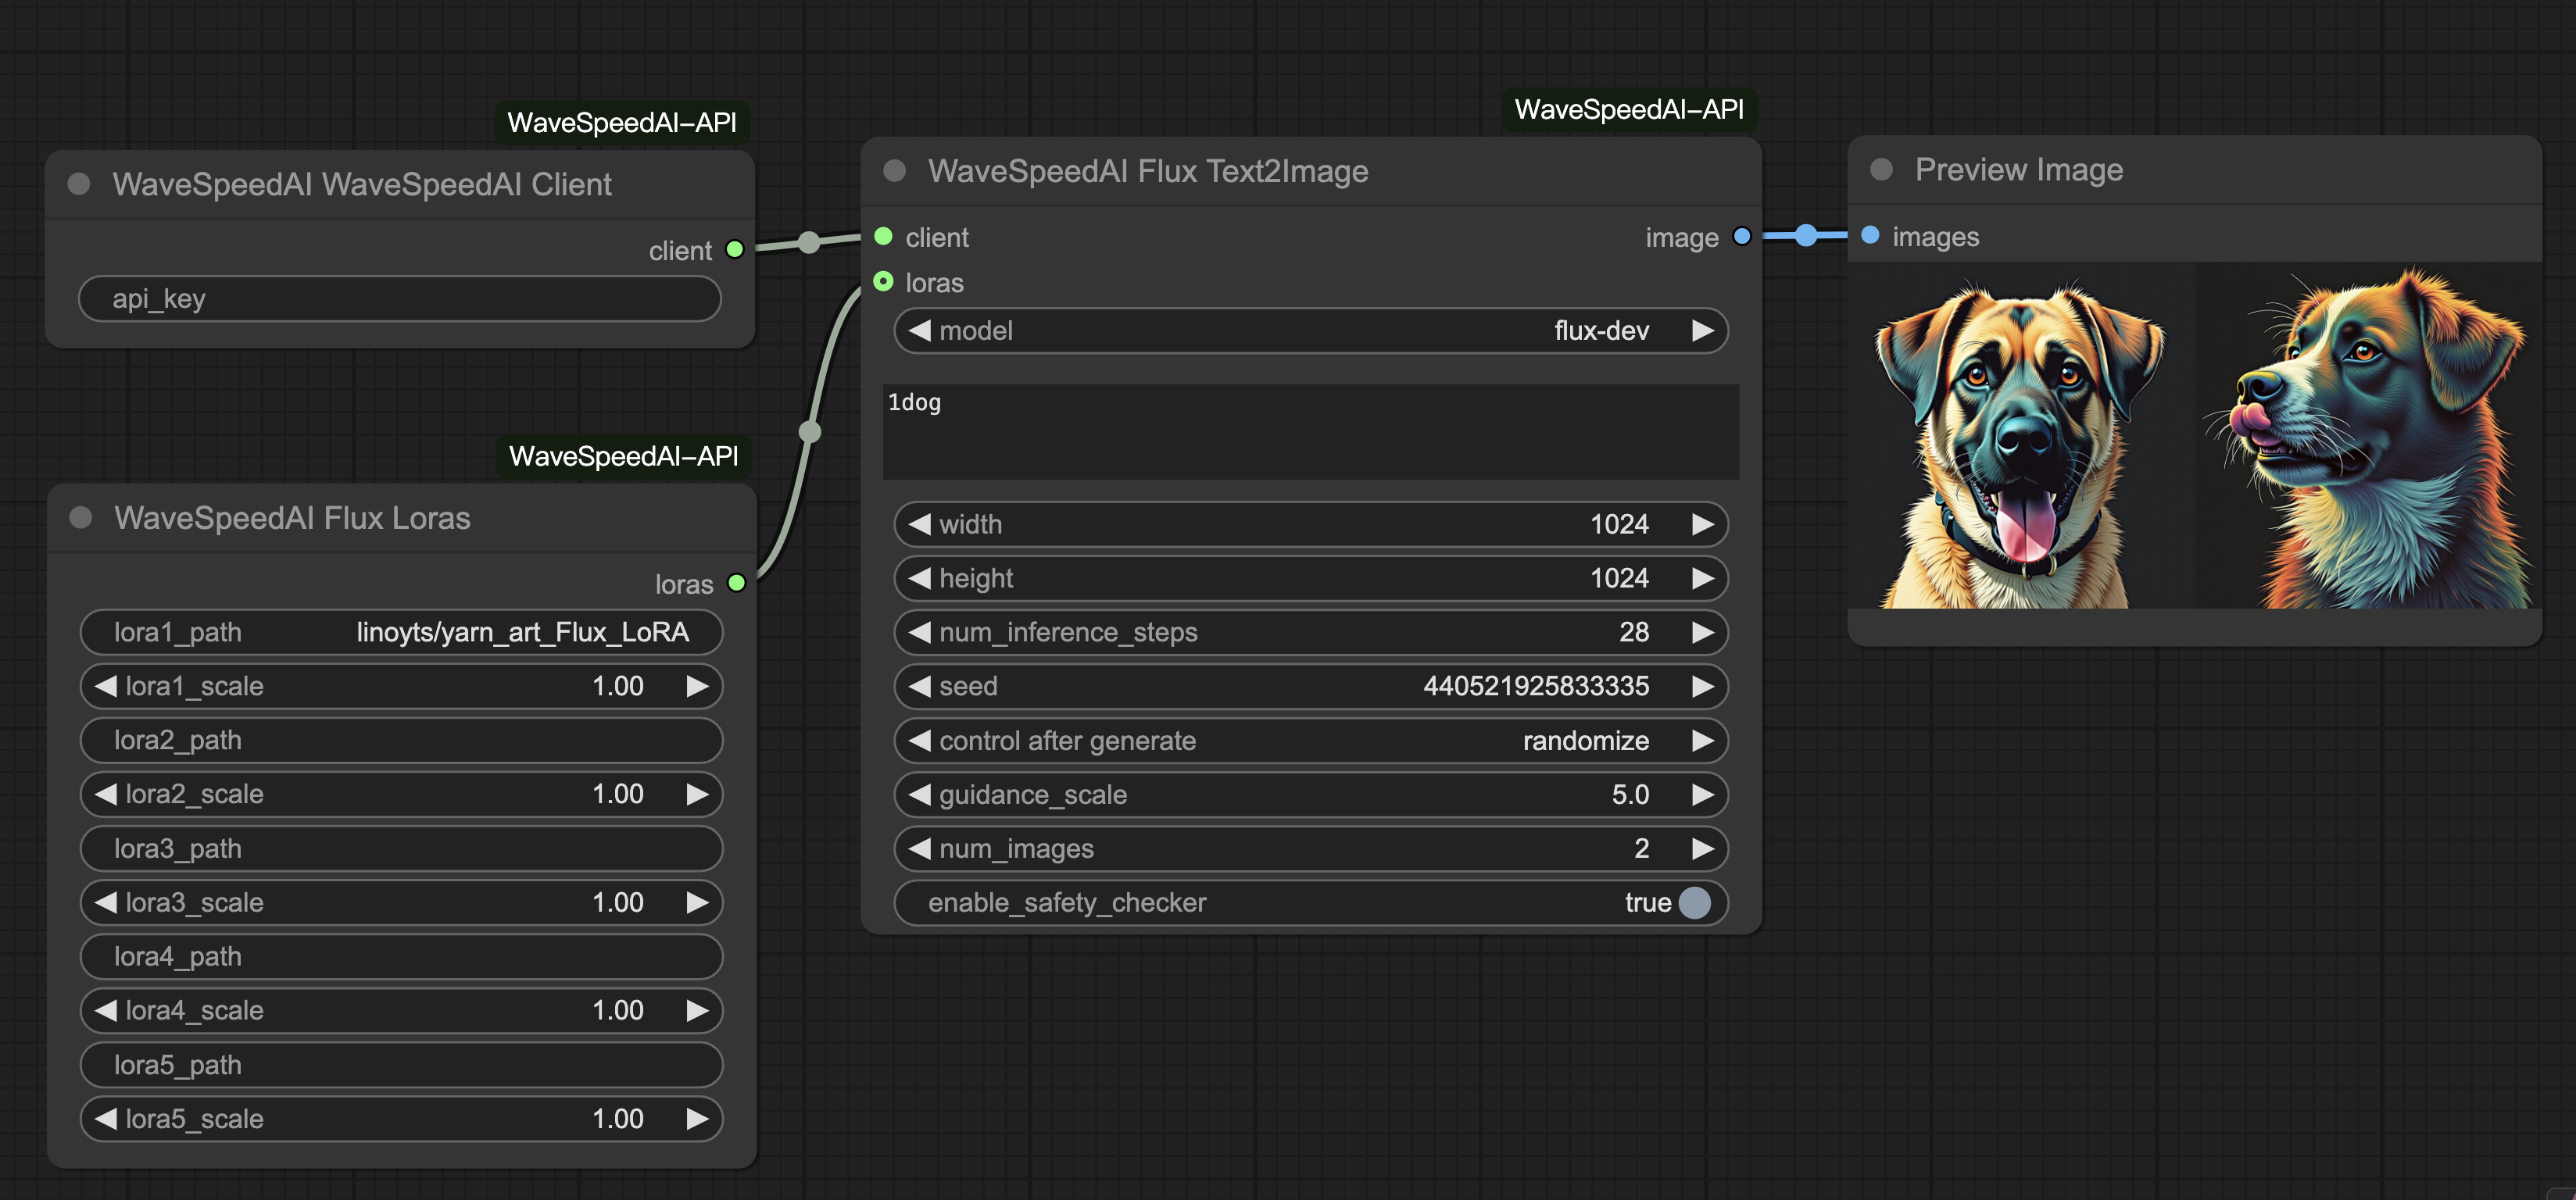

#### Wan Text to Video (T2V)

**Wan Sample WorkFlow**
([wan-t2v-lora.json](https://github.com/WaveSpeedAI/wavespeed-comfyui/blob/master/examples/wan-t2v-lora.json))


This node generates a video from a text prompt using the Wan2.1 T2V model.
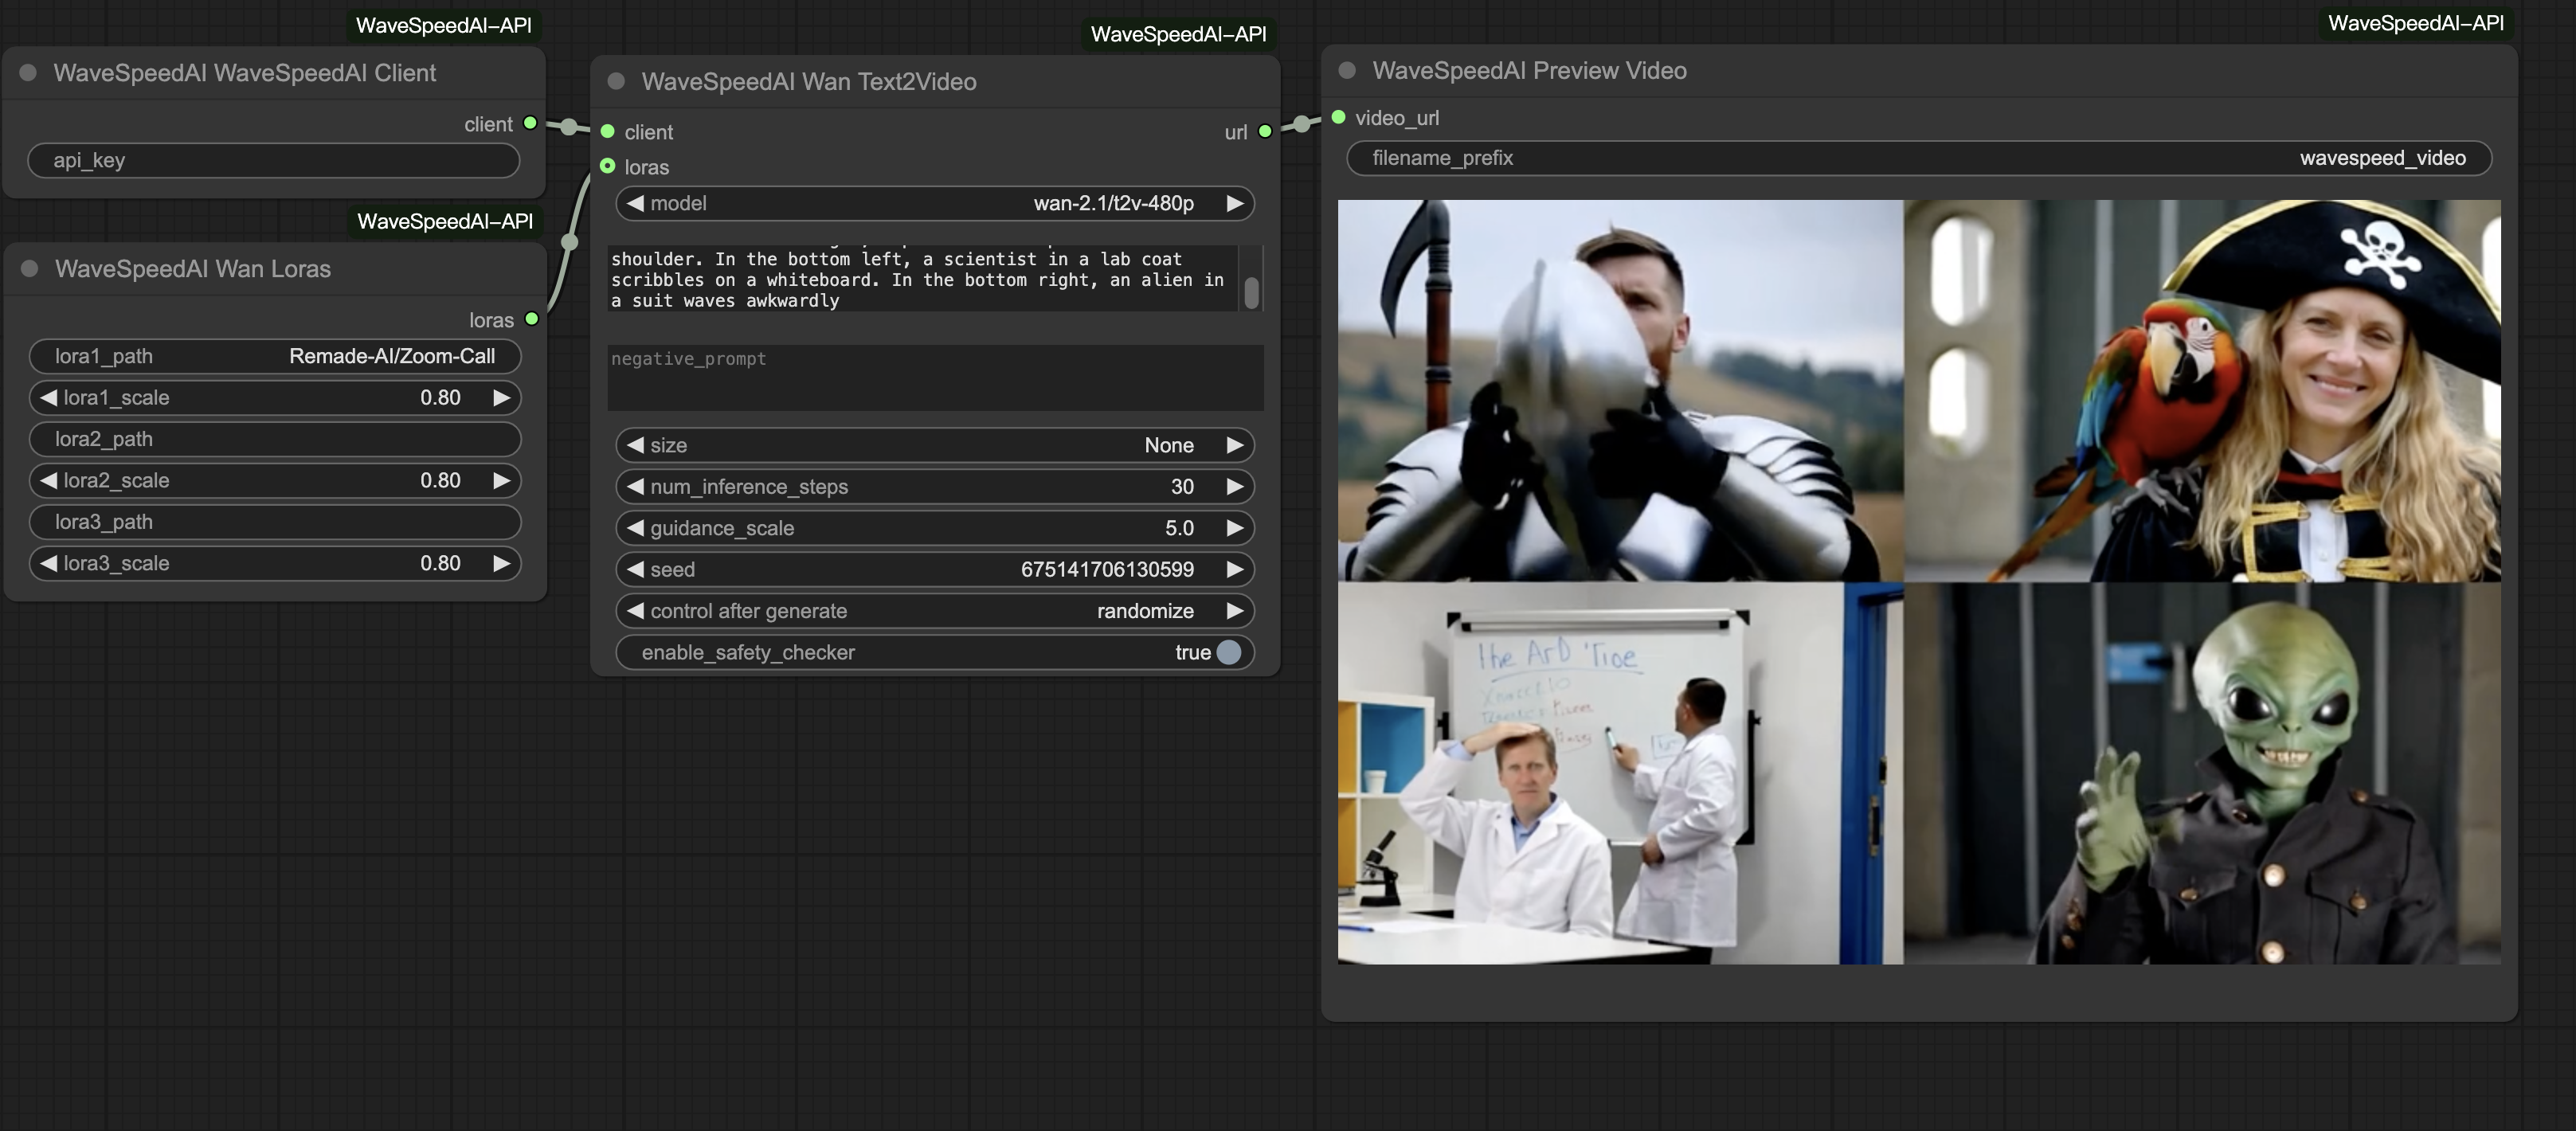